Bright Image Calibration

In [174]:
import os
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [100]:
path = r'K:\Google Drive\DESI\focal_plane_software\bright image calibration\fvc.20191004115421.fits'
image_data = fits.getdata(path, ext=0)  # FVC image has a y-flip w.r.t. y-axis compared to CS5
data = pd.read_pickle('data_spotmatch.pkl', compression='gzip')

examine distribution of data range

(array([  8392.,   2368.,   2038.,   1470.,   1459.,   1801.,   3037.,
          5712.,  13347.,  27601.,  46187.,  83478., 128217., 180774.,
        213017., 284543., 335512., 349326., 423067., 467251., 510574.,
        503722., 581805., 608527., 574398., 636328., 646830., 657513.,
        612035., 680473., 687453., 637335., 697813., 694496., 680401.,
        605417., 631174., 594848., 560789., 481457., 496145., 467827.,
        412008., 433420., 418950., 408598., 366397., 390578., 381278.,
        340076., 362507., 355163., 349030., 315129., 341323., 338854.,
        310587., 335711., 333533., 329726., 296092., 315361., 306748.,
        271671., 285442., 273816., 261541., 229232., 239871., 232419.,
        226079., 202954., 216288., 211685., 192222., 208462., 206666.,
        205002., 186882., 201130., 198156., 178852., 190639., 185831.,
        180439., 160366., 169126., 164255., 146990., 154840., 150392.,
        146106., 131013., 140570., 138171., 126262., 135489., 134102.,
      

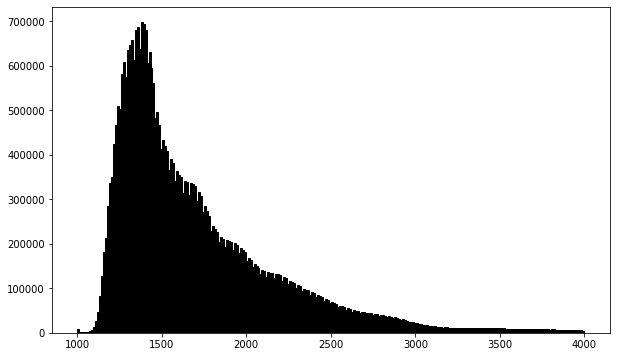

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(image_data.ravel(), bins=256, range=(1e3, 4e3), fc='k', ec='k')

Display entire focal plane

In [80]:
# Define a triangle that encloses each petal in FVC pixels
def getpostriangle(petal_loc):
    xc, yc = 3020.3600823, 3015
    theta0 = 180.4
    theta1 = (36*petal_loc - 18. + theta0)*np.pi/180.
    theta2 = (36*petal_loc + 18. + theta0)*np.pi/180.
    x1 = 3000*np.sin(theta1) + xc
    y1 = 3000*np.cos(theta1) + yc
    x2 = 3000*np.sin(theta2) + xc
    y2 = 3000*np.cos(theta2) + yc
    return [x1, x2, xc, x1], [y1, y2, yc, y1]

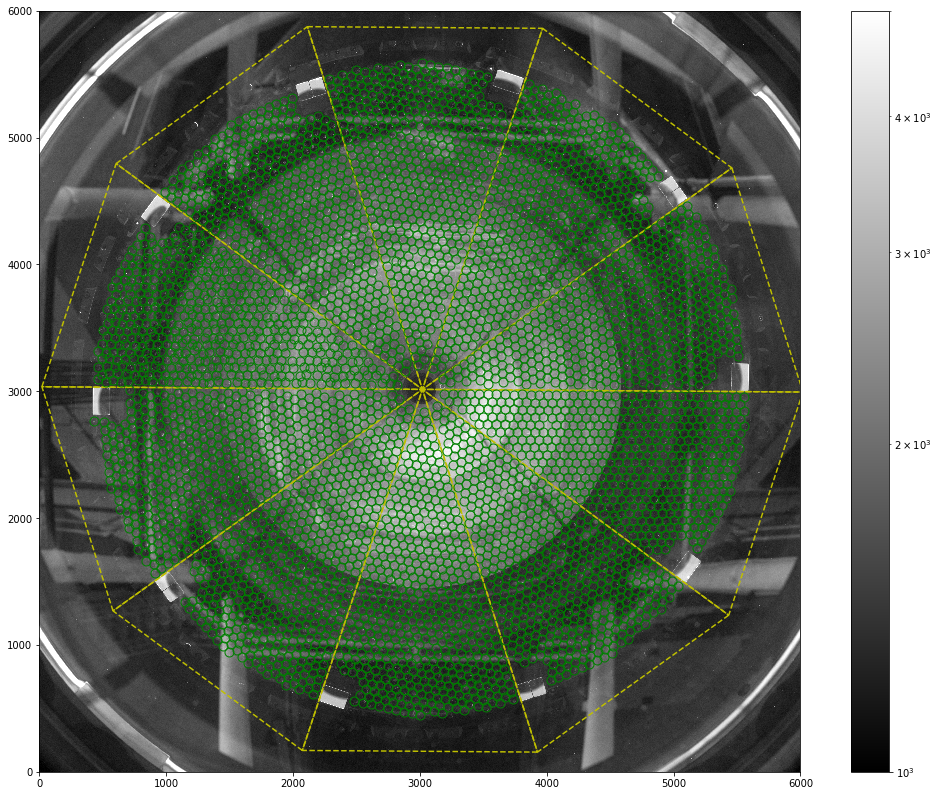

In [132]:
petal_locs = range(10)
fig, ax = plt.subplots(figsize=(18, 14))
img = ax.imshow(image_data, cmap='gray', aspect='equal', origin='lower',
                norm=colors.LogNorm(vmin=1e3, vmax=5e3))
ax.set_xlim([0, image_data.shape[1]])
ax.set_ylim([0, image_data.shape[0]])
fig.colorbar(img)
for petal_loc in petal_locs:
    xco, yco = getpostriangle(petal_loc)
    ax.plot(xco, yco, 'y--')
    dp = data[data['petal_loc'] == petal_loc]
    ax.plot(dp[f'fvc_x_{petal_loc}0'], dp[f'fvc_y_{petal_loc}0'], 'go', fillstyle='none', ms=9, mew=1)
# fig.savefig('bright.png', dpi=400, bbox_inches='tight')

determine which spotmatch result to use, given a single exposure and pos file

In [216]:
pos_filename = 'fvc.20191004001051.pos'  # this is when the bright image was taken
PC00 = ['fvc.20191003232306.pos', 'fvc.20191003233356.pos', 'fvc.20191003234547.pos']
PC01 = ['fvc.20191003234904.pos', 'fvc.20191004000051.pos', 'fvc.20191004001051.pos']
PC02 = ['fvc.20191004170751.pos', 'fvc.20191004190200.pos', 'fvc.20191004191322.pos']
PC03 = ['fvc.20191003213313.pos', 'fvc.20191003214640.pos', 'fvc.20191003222441.pos']
PC04 = ['fvc.20191003222441.pos', 'fvc.20191004190200.pos', 'fvc.20191007152624.pos']
PC05 = ['fvc.20191007152624.pos', 'fvc.20191007153833.pos', 'fvc.20191007162144.pos']
PC06 = ['fvc.20191007162144.pos', 'fvc.20191007172910.pos', 'fvc.20191007180412.pos']
PC07 = ['fvc.20191007180412.pos', 'fvc.20191007183104.pos', 'fvc.20191007184307.pos']
PC08 = ['fvc.20191007184307.pos', 'fvc.20191007185532.pos', 'fvc.20191007190739.pos']
PC09 = ['fvc.20191007190739.pos', 'fvc.20191007192116.pos', 'fvc.20191007193250.pos']
petlist = [PC00, PC01, PC02, PC03, PC04, PC05, PC06, PC07, PC08, PC09]
def determine_exp_no(petal_loc):
    number = int(pos_filename[4:-4])
    numbers = np.array([int(fn[4:-4]) for fn in petlist[petal_loc]])
    if np.all(numbers < number):  # all exposures were taken before the bright image
        exp_no = 2
    elif np.all(numbers > number):  # all exposures were taken after the bright image
        exp_no = 0
    else:
        exp_no = int(np.where((numbers <= number) == True)[0][-1])
    return exp_no

Display local region of a dark positioner

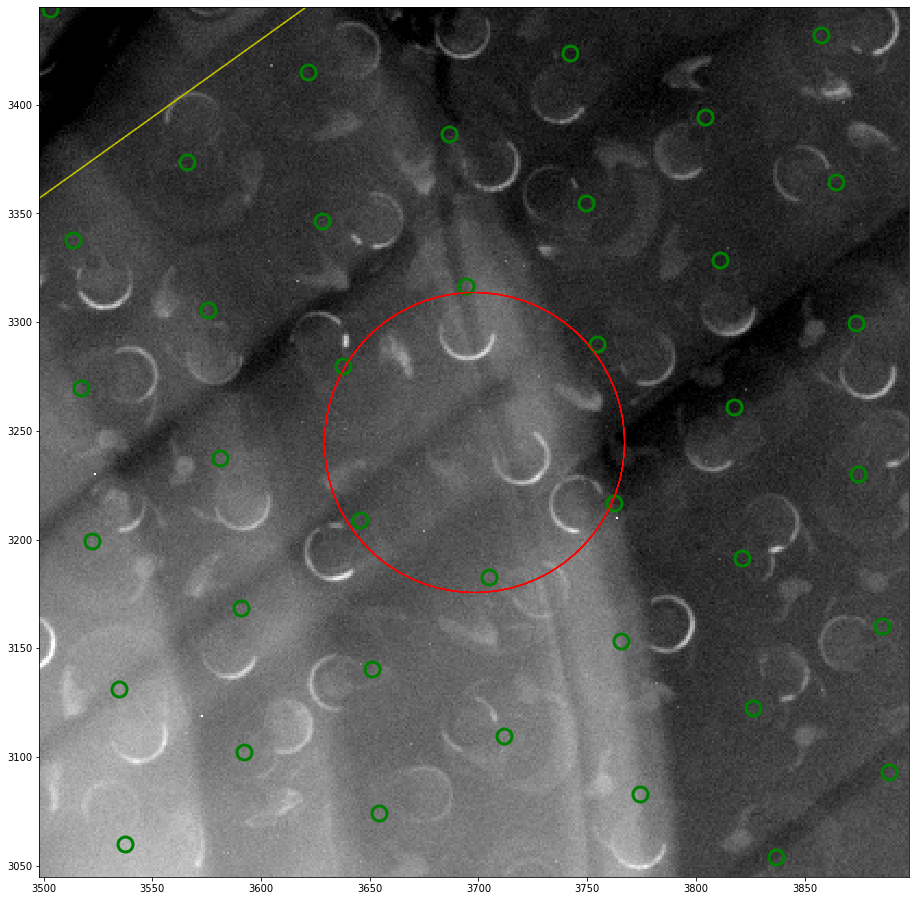

In [224]:
def plot_dark_pos(posid):
    ext_margin = 200
    petal_loc = data.loc[posid, 'petal_loc']
    xcentre = data.loc[posid, 'obs_x_px']
    ycentre = data.loc[posid, 'obs_y_px']
    xmin, xmax = xcentre-ext_margin, xcentre+ext_margin
    ymin, ymax = ycentre-ext_margin, ycentre+ext_margin

    fig, ax = plt.subplots(figsize=(16, 16))
    img = ax.imshow(image_data, cmap='gray', aspect='equal', origin='lower',
                    norm=colors.LogNorm(vmin=2e3, vmax=5e3))
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    # fig.colorbar(img)
    for petal_loc in petal_locs:
        xco, yco = getpostriangle(petal_loc)
        ax.plot(xco, yco, 'y--')
        dp = data[data['petal_loc']==petal_loc]
        exp_no = determine_exp_no(petal_loc)
        ax.plot(xcentre, ycentre, 'ro', fillstyle='none', ms=300, mew=1)
        ax.plot(dp[f'fvc_x_{petal_loc}{exp_no}'], dp[f'fvc_y_{petal_loc}{exp_no}'], 'go', fillstyle='none', ms=15, mew=3)
    # fig.savefig('bright.png', dpi=400, bbox_inches='tight')
    return img

posid = 'M03554'
plot_dark_pos(posid)

Plot the given pos file corresponding to bright image, and double-check if the correct exp_no is chosen for spotmatch results

In [ ]:
def read_pos_data(petal_loc, exposure_number):
    pos_data = pd.read_csv(os.path.join('fvc_pos_files', petlist[petal_loc][exposure_number]), header=None,
                           usecols=[0, 1], names=['fvc_x', 'fvc_y'], sep=' ')
    return pos_data

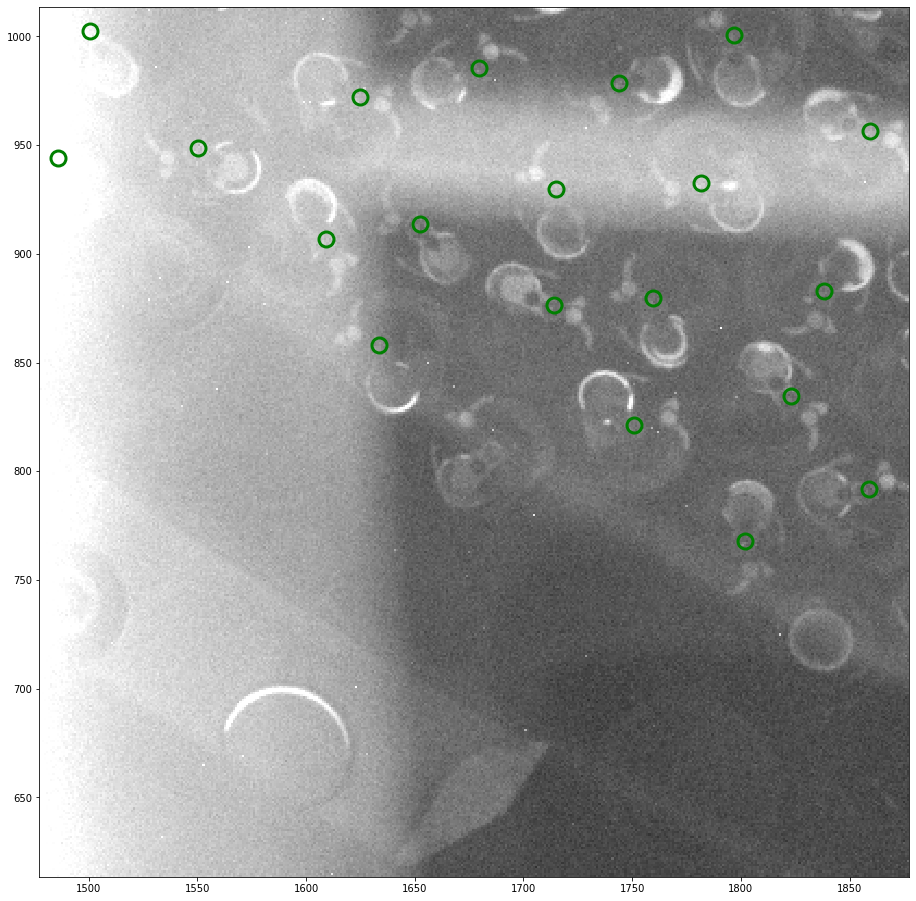

In [202]:
pos_data = read_pos_data(1, 2)
ext_margin = 200
petal_loc = data.loc[posid, 'petal_loc']
xcentre = data.loc[posid, 'obs_x_px']
ycentre = data.loc[posid, 'obs_y_px']
xmin, xmax = xcentre-ext_margin, xcentre+ext_margin
ymin, ymax = ycentre-ext_margin, ycentre+ext_margin

fig, ax = plt.subplots(figsize=(16, 16))
img = ax.imshow(image_data, cmap='gray', aspect='equal', origin='lower',
                norm=colors.LogNorm(vmin=1e3, vmax=2.5e3))
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
# fig.colorbar(img)

ax.plot(pos_data['fvc_x'], pos_data['fvc_y'], 'go', fillstyle='none', ms=15, mew=3)
# fig.savefig('bright.png', dpi=400, bbox_inches='tight')

Get cursor click position

In [ ]:
img = plot_dark_pos('M01190')

Please click


__main__:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


clicked []


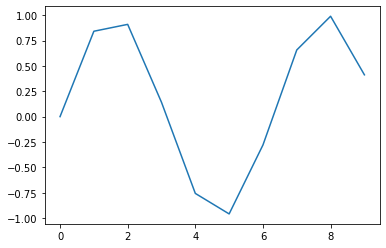

In [197]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(10)
plt.plot(t, np.sin(t))
print("Please click")
x = plt.ginput(3)
print("clicked", x)
plt.show()